In [20]:
# # change the directory to EC523_Project_G
# %cd ..
# %pwd

In [21]:
# import diffusers
# print(diffusers.__file__)
# import inspect
# print(inspect.getsource(diffusers))


from pathlib import Path
import os 
# add ../ to path
# added_path = os.path.abspath(str((Path.cwd().parent.parent / "lib")).__str__())
# if added_path not in os.sys.path:
#     os.sys.path.append(added_path)  

project_main_path = Path.cwd().parent
assert project_main_path.name == 'EC523_Project_G'
added_path = os.path.abspath(project_main_path.__str__())
if added_path not in os.sys.path:
    os.sys.path.append(added_path)  



PHASE3_SCENE_DESCRIPTION_FILE = "./DATASET/PROCESSING_RECORD_PHASE3_SCENE_DESCRIPTION.json"
dataset_path = os.path.abspath(project_main_path) # adjust the path to the dataset


In [22]:
from lib import data

In [23]:
# PHASE3_SCENE_DESCRIPTION_FILE = "./DATASET/PROCESSING_RECORD_PHASE3_SCENE_DESCRIPTION.json"
# dataset_path = "../" # adjust the path to the dataset
# # data_loader = data.get_dataloader(PHASE3_SCENE_DESCRIPTION_FILE, dataset_path=dataset_path, MAX_NUM_FIGURE=5, batch_size=4, shuffle=False)
# dataset = data.get_dataset(PHASE3_SCENE_DESCRIPTION_FILE, dataset_path=dataset_path, MAX_NUM_FIGURE=5)
# # # print(dataset)
# # data_loader = data.get_dataloader(dataset, batch_size=4, shuffle=False)



# # data.display_data(data_loader, num_of_batch=1)

In [24]:

import importlib 
from lib import data as anime_data
importlib.reload(anime_data)
import torch

import importlib
importlib.reload(anime_data)

from torch.utils.data import DataLoader

In [25]:

MAX_NUM_FIGURE = 5
BATCH_SIZE = 4
DATASET_SHUFFLE = True


Start Loading Metadata...
series_name: usagi_s1_
series_name: cute
Finish Loading Metadata...
dict_keys(['scene_img', 'inpainting_img', 'figure_img_list', 'len_figure', 'mask_img_list', 'description'])
len_train: 7377, len_test: 820
dataset_train: 7377, dataset_test: 820


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 In the image, there are two female figures, one on the left and the other on the right. They are standing in front of a door, which is the main focal point of the scene. The door is open, and the figures appear to be looking into the room beyond. The room seems to be a part of a house, as indicated by the presence of a closet. The figures are positioned close to each other, suggesting a possible connection or interaction between them. The overall setting appears to be a domestic environment, with the figures possibly engaging in a conversation or preparing to enter the room.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 The image features a young boy with purple hair, wearing a blue jacket, and holding a pencil. He is standing in a room with a TV in the background. Another person, possibly a girl, is also present in the scene, standing close to the boy. The room appears to be a living space, with a potted plant placed nearby. The boy seems to be engaged in an activity, possibly drawing or writing, while the other person is observing or participating in the same activity.


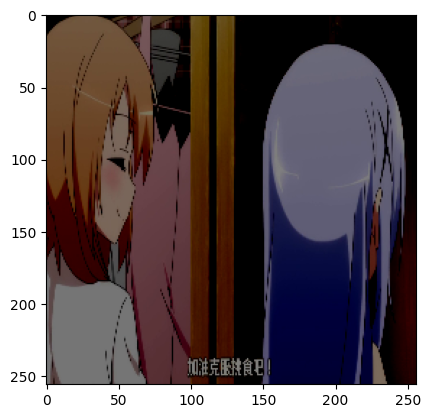

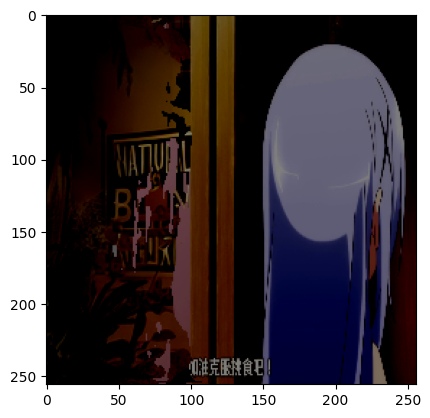

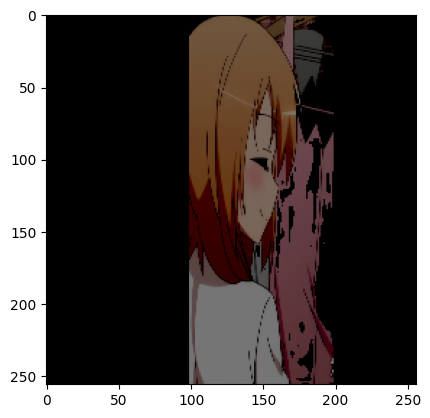

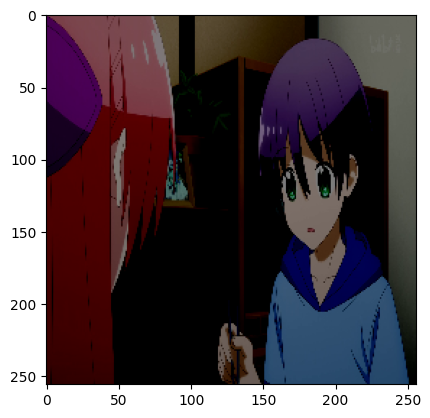

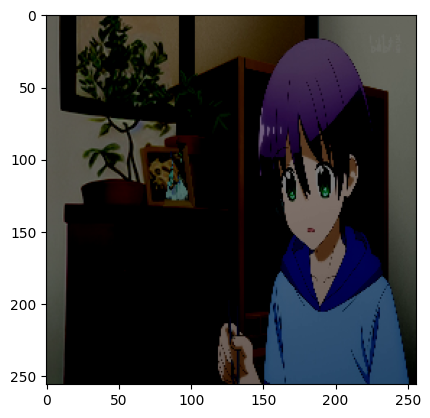

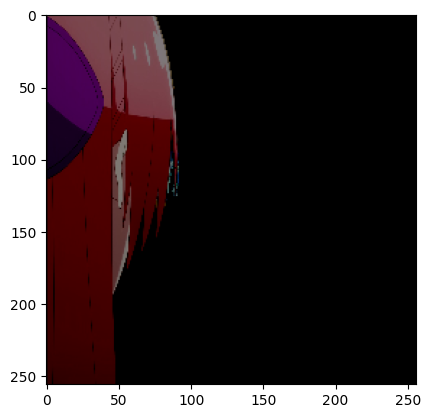

In [26]:



anime_figure_scene_dataset = anime_data.get_dataset(PHASE3_SCENE_DESCRIPTION_FILE, dataset_path=dataset_path, MAX_NUM_FIGURE=MAX_NUM_FIGURE)
# print(len(anime_figure_scene_dataset))
print(anime_figure_scene_dataset[0].keys())


# import torch
# from torch.utils.data import  DataLoader

len_dataset = len(anime_figure_scene_dataset)
len_train = int(0.9 * len_dataset)
len_test = len_dataset - len_train
print(f"len_train: {len_train}, len_test: {len_test}")
dataset_train = torch.utils.data.Subset(anime_figure_scene_dataset, range(0, len_train))
dataset_test = torch.utils.data.Subset(anime_figure_scene_dataset, range(len_train, len_dataset))
print(f"dataset_train: {len(dataset_train)}, dataset_test: {len(dataset_test)}")






dataloader_train = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=DATASET_SHUFFLE)
dataloader_test = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=DATASET_SHUFFLE)

anime_data.display_data(dataloader_train, num_of_batch=1)
anime_data.display_data(dataloader_test, num_of_batch=1)

# dataset_concate = torch.utils.data.ConcatDataset([dataset_train, dataset_test])
# dataloader_concate = DataLoader(dataset_concate, batch_size=5)

# print(len(dataloader_train), len(dataloader_test), len(dataloader_concate))

# REF https://pytorch.org/docs/stable/data.html

# torch.utils.data.ChainDataset(datasets) # on-the-fly concatenation, only for iterable datasets
# torch.utils.data.ConcatDataset(datasets)

### Dry run dataloader

In [35]:
for i_batch, x in enumerate(dataloader_train):
    # print(i_batch, x.keys())
    # break
    continue

for i_batch, x in enumerate(dataloader_test):
    # print(i_batch, x.keys())
    # break
    continue

In [34]:

print(anime_figure_scene_dataset.data.keys())

from collections import Counter
a = anime_figure_scene_dataset.data["figure_path_list"]
len_dist = Counter([len(x) for x in a])
print(len_dist)

dict_keys(['scene_path_list', 'inpainting_image_path_list', 'figure_path_list', 'description_list'])
Counter({1: 3694, 2: 2404, 3: 1291, 4: 483, 5: 186, 6: 78, 7: 39, 9: 9, 8: 9, 10: 4})
